In [142]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../python')
from functions import *
from models import *
import tensorflow as tf
from livelossplot import PlotLossesKeras
os.environ["CUDA_VISIBLE_DEVICES"] = "2" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [143]:
save_folder = "patch_2"

if save_folder is not None: 
    os.makedirs(save_folder, exist_ok=True)

In [144]:
df = pd.read_hdf('../gaia_data/gd1/gaiascan_l225.0_b33.7_ra138.1_dec5.7.h5') # patch 2 
# df = pd.read_hdf('../gaia_data/gd1/gaiascan_l99.0_b50.2_ra224.7_dec60.6.h5') # patch 6

df = df[df.g < 20.2] # reduces streaking 
test = test[(0.5 < test['b-r']) & (test['b-r'] < 1)]

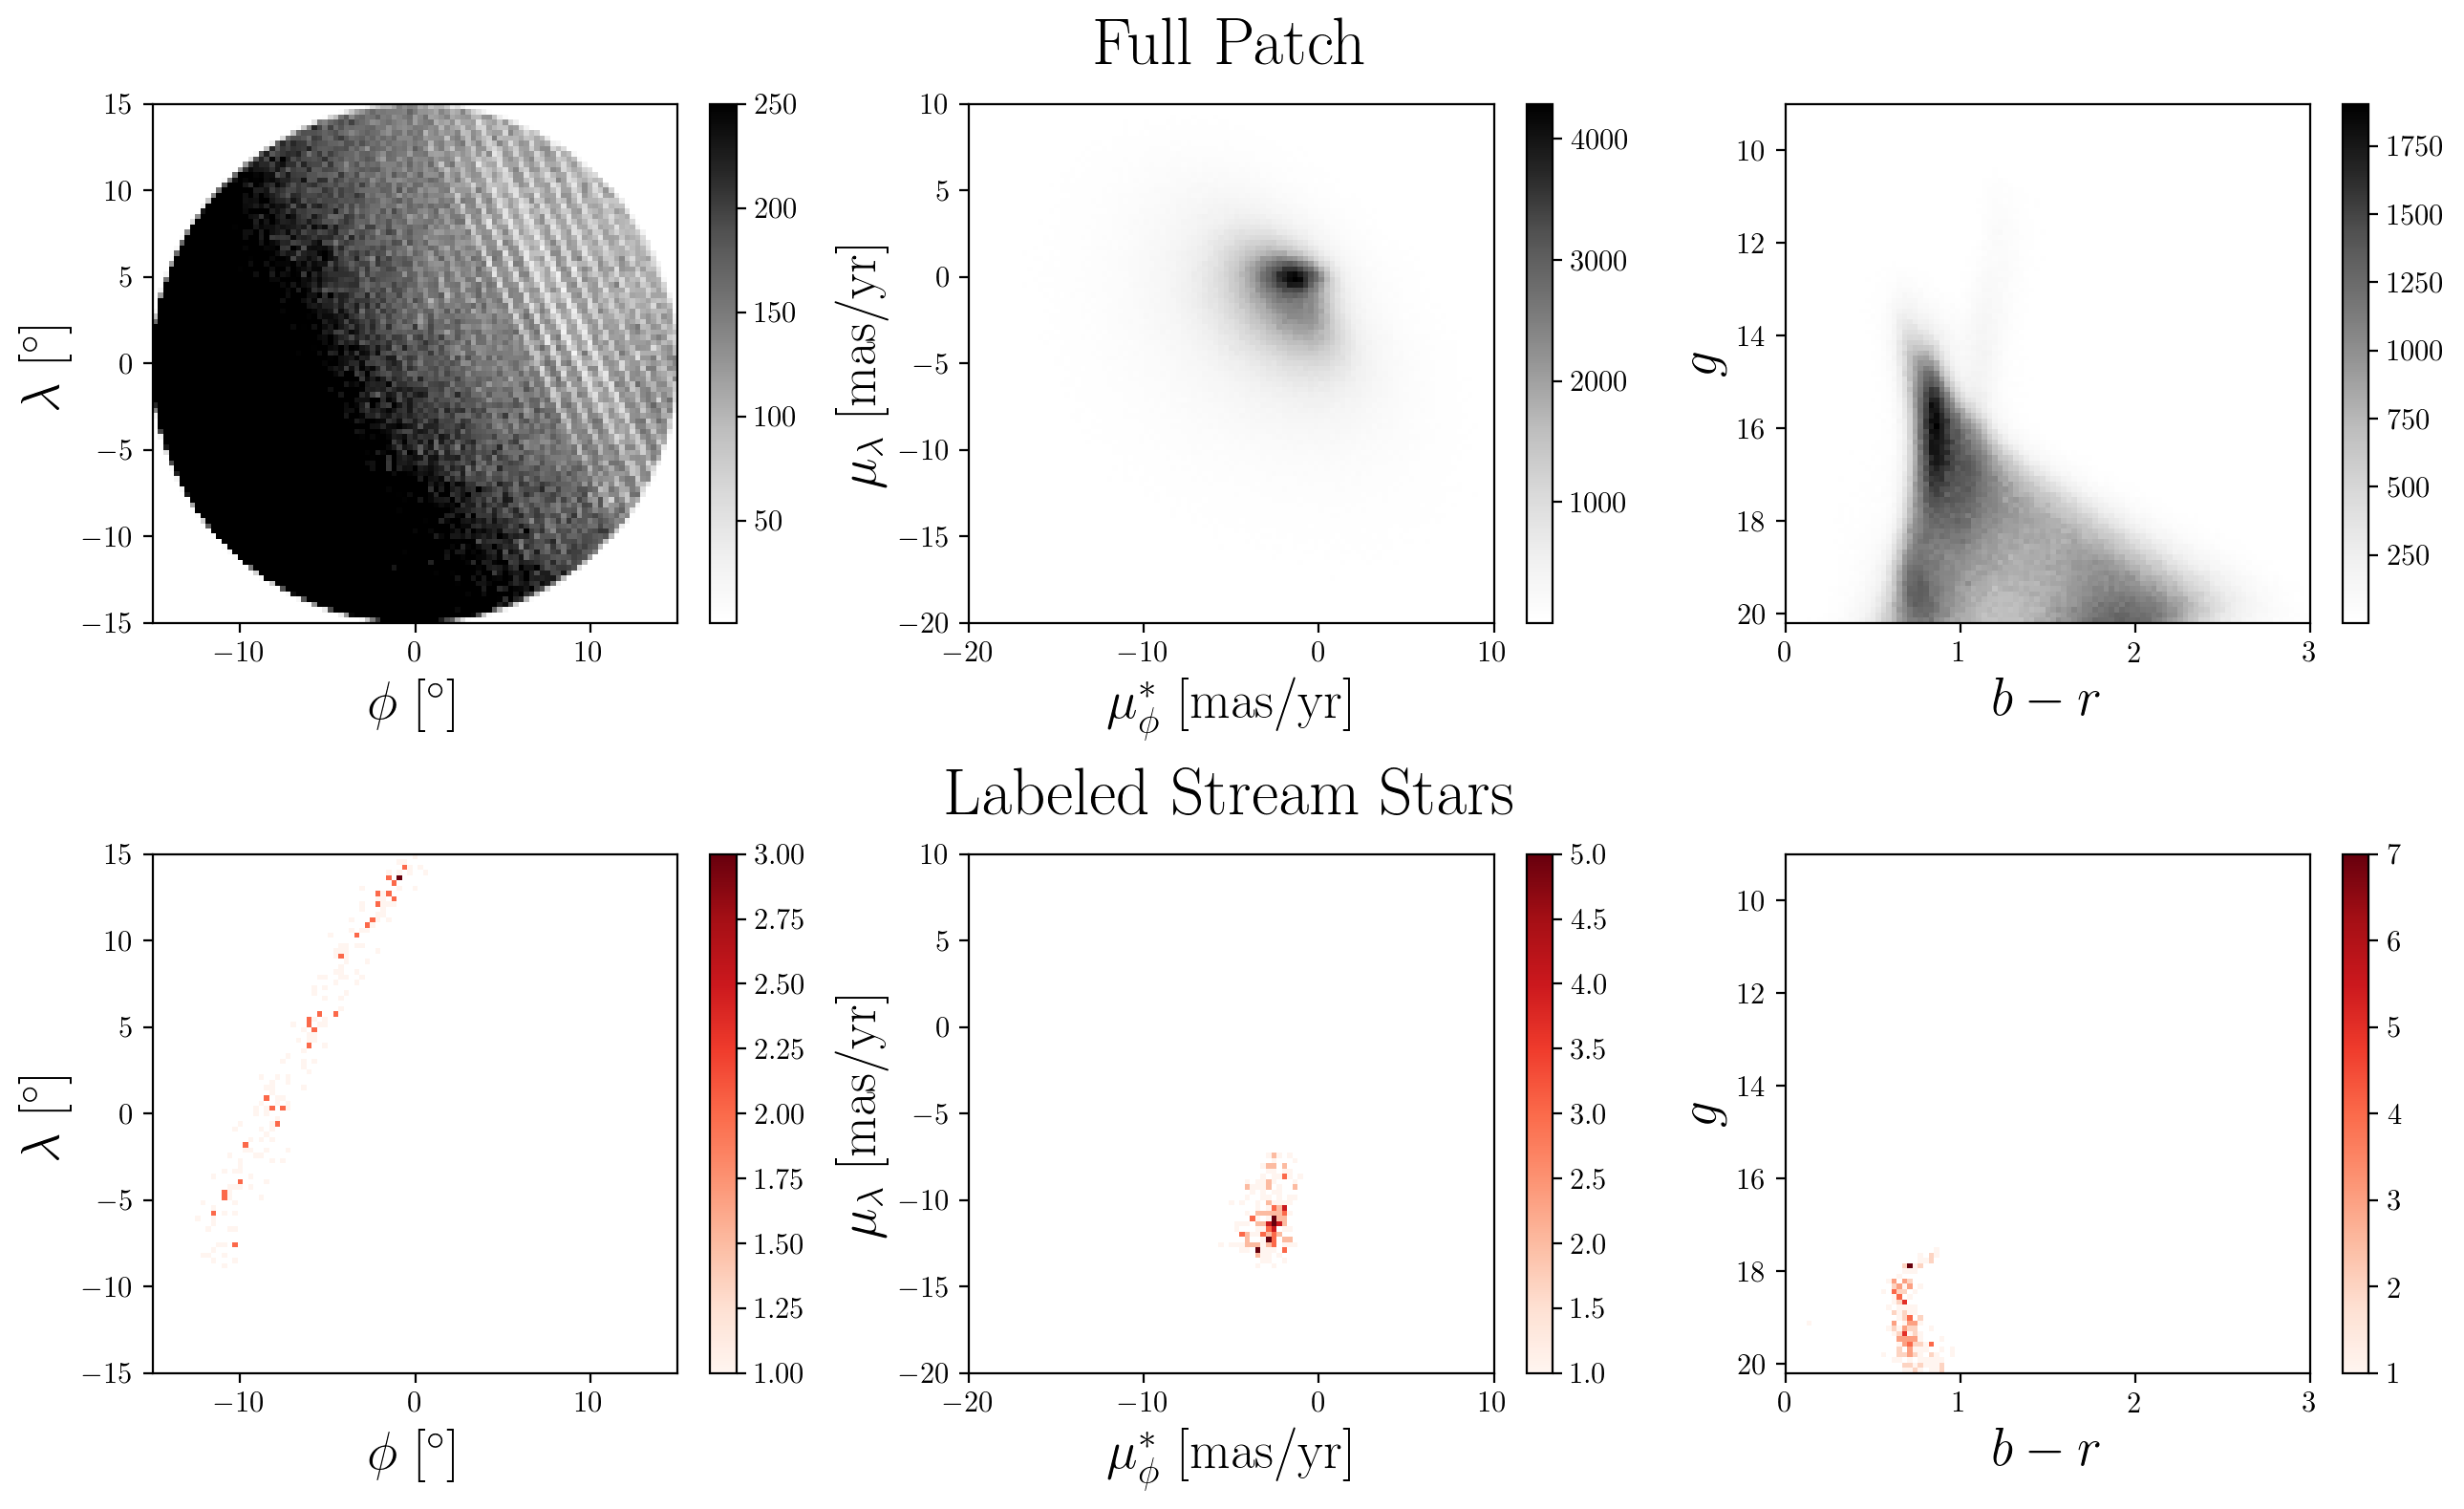

In [145]:
make_plots(df, save_folder = save_folder)

SR factor: 1
SB factor: 3
Scanning over μ_λ
Sideband region: [-15.9,-12.8) & (-9.7,-6.6]
Signal region: [-12.8,-9.7]
Total counts: SR = 63,993, SB = 173,715
Signal region has 146 stream and 63,847 bkg events (0.23%).
Sideband region has 210 stream and 237,498 bkg events (0.09%).
f_sig = 2.6X f_sideband.


,μ_δ,μ_α,δ,α,b-r,g,ϕ,λ,μ_ϕcosλ,μ_λ,stream,α_wrapped,patch_id,label
7,-9.227347,7.643475,18.983820,139.536682,0.781096,15.665138,1.429801,13.326589,7.667458,-9.207428,False,139.536682,2,0
9,-12.490481,-3.770522,19.196545,137.586731,1.810186,18.289309,-0.464922,13.537695,-3.781103,-12.487282,False,137.586731,2,1
10,-7.276011,3.402354,18.987411,138.084839,1.864073,19.863035,0.018944,13.328372,3.402605,-7.275894,False,138.084839,2,0
12,-9.947346,-0.912017,19.129854,138.633301,1.236783,15.355245,0.551775,13.471083,-0.902018,-9.948257,False,138.633301,2,1
20,-10.124191,2.250060,18.679220,137.459045,1.821404,18.020487,-0.589521,13.020487,2.239215,-10.126595,False,137.459045,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095498,-13.306773,0.384855,-1.027502,145.479889,1.506771,16.987545,7.463672,-6.638987,0.555297,-13.300751,False,145.479889,2,0
2095505,-7.837126,-12.982089,-0.645128,146.035217,0.835920,15.633719,8.017319,-6.249272,-12.873069,-8.014941,False,146.035217,2,0
2095506,-7.561008,3.952896,-0.735025,145.460022,1.337872,20.055857,7.439921,-6.346789,4.049124,-7.509916,False,145.460022,2,0
2095509,-7.273654,-4.680989,-0.460681,146.145233,1.012683,15.319835,8.125380,-6.063319,-4.579156,-7.338189,False,146.145233,2,0


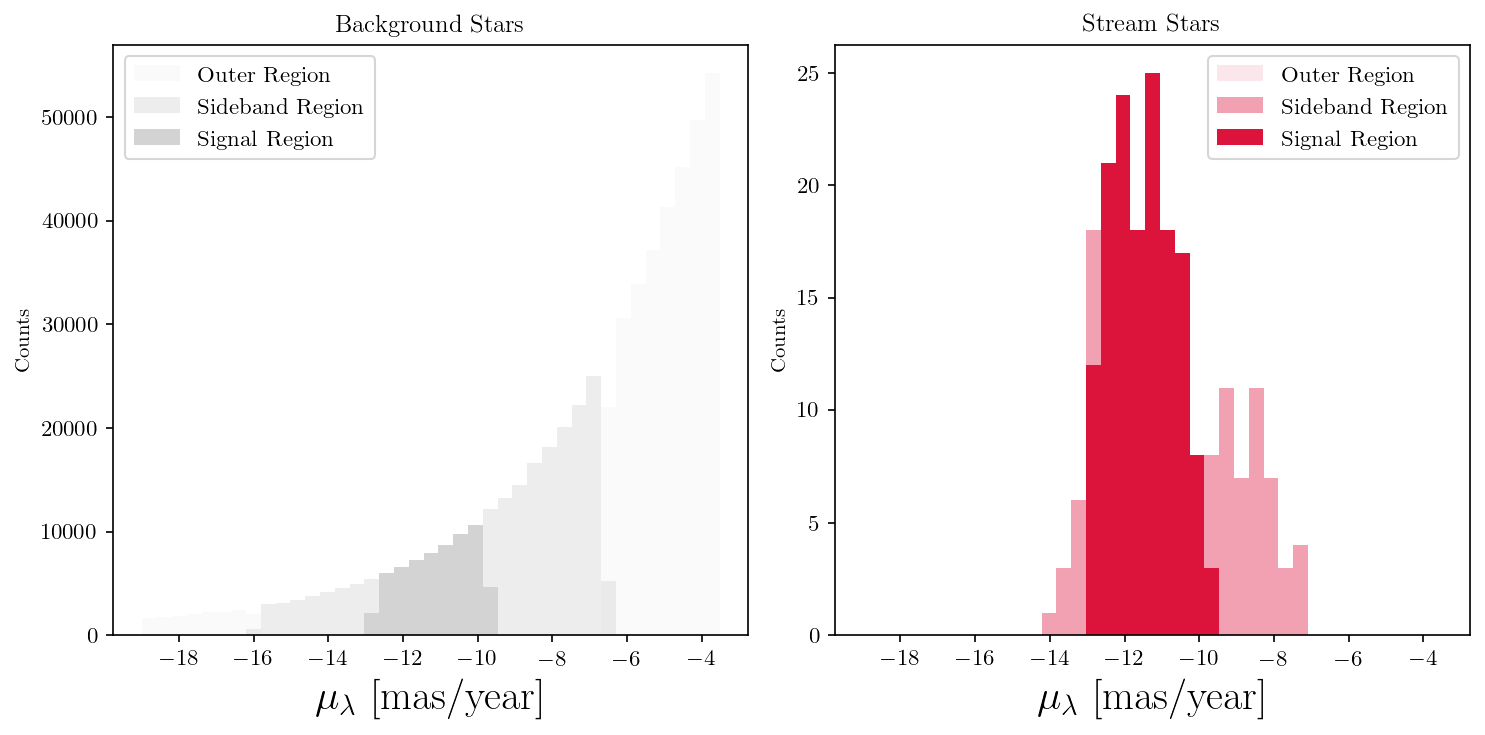

In [147]:
signal_sideband(df) # default setup

SR factor: 1
SB factor: 3
Scanning over μ_λ
Sideband region: [-15.0,-14.0) & (-11.0,-10.0]
Signal region: [-14.0,-11.0]
Total counts: SR = 45,944, SB = 33,627
Signal region has 117 stream and 45,827 bkg events (0.26%).
Sideband region has 157 stream and 79,414 bkg events (0.20%).
f_sig = 1.3X f_sideband.


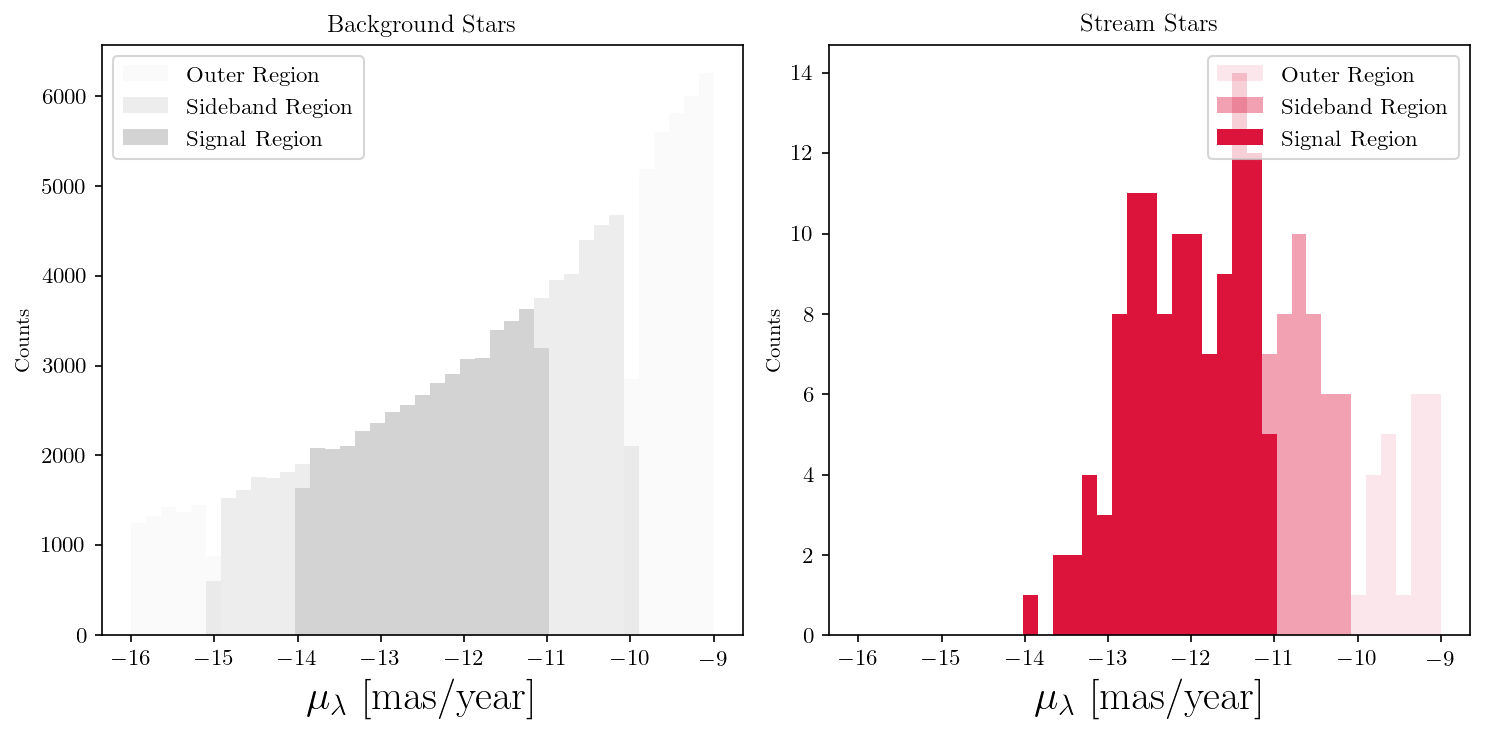

In [150]:
# sr_factor = 2
# sb_factor = 4
df_slice = signal_sideband(df, 
#                            sr_factor = sr_factor, sb_factor=sb_factor, 
                           sb_min = -15, sr_min = -14, sr_max = -11, sb_max=-10,
                           save_folder = save_folder)

# Train

498/498 [==============================] - 1s 999us/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
498/498 [==============================] - 1s 1ms/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
498/498 [==============================] - 0s 886us/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
498/498 [==============================] - 0s 818us/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
498/498 [==============================] - 0s 837us/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...


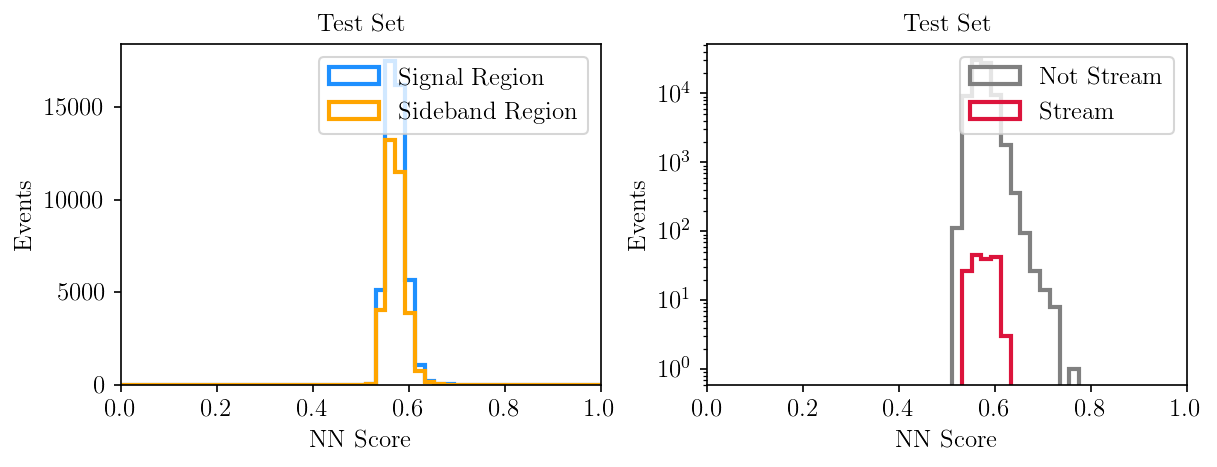

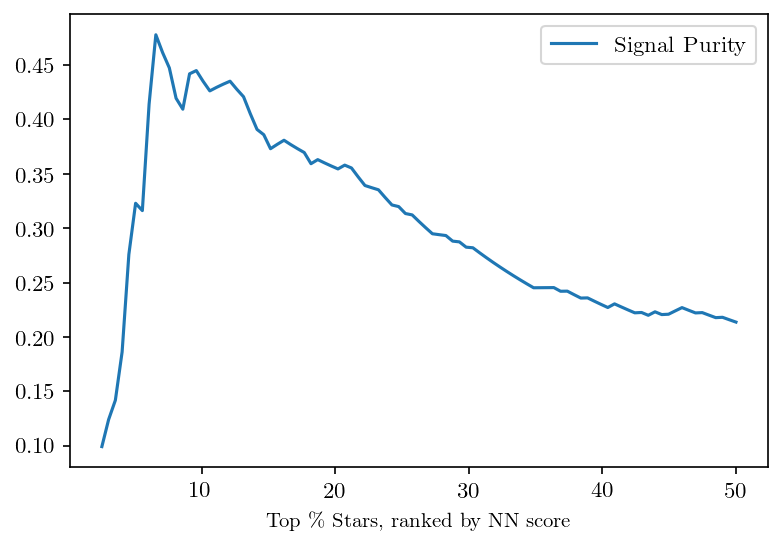

Top 50 stars: Purity = 0.0% 


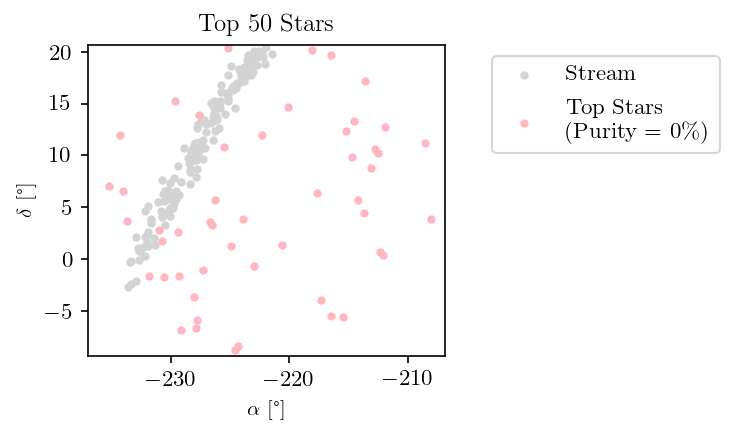

Top 100 stars: Purity = 0.0% 


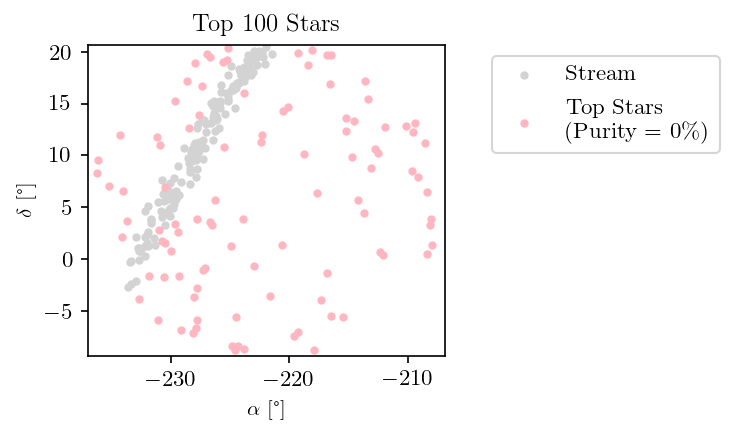

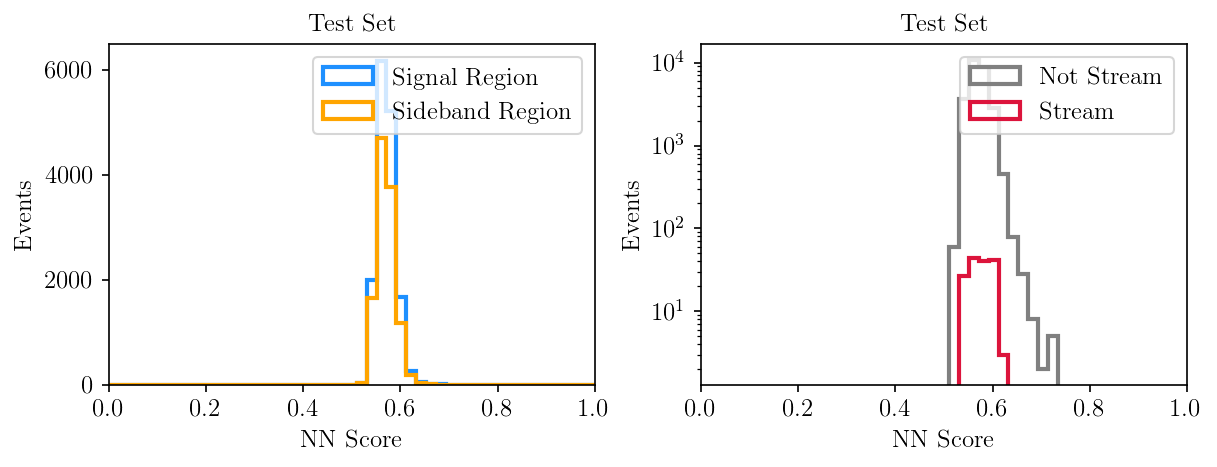

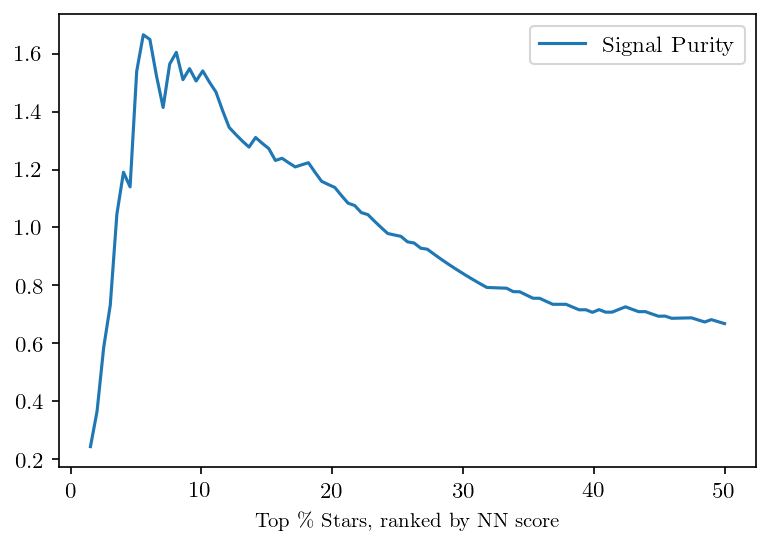

Top 50 stars: Purity = 0.0% 


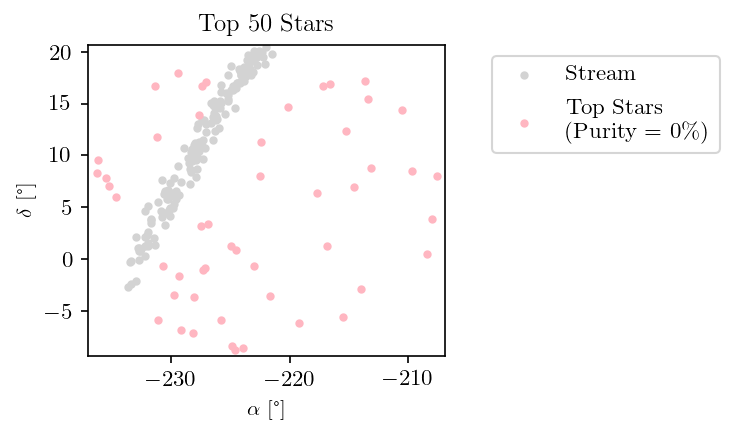

Top 100 stars: Purity = 0.0% 


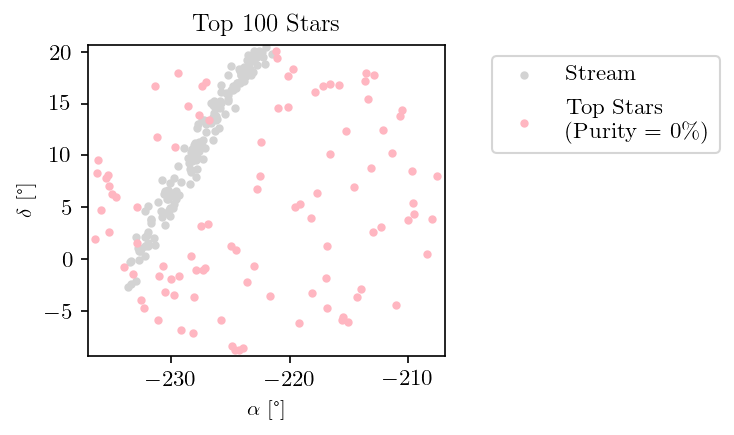

In [151]:
tf.keras.backend.clear_session()
df_test = train(df_slice, verbose = False, save_folder = save_folder)

# Apply cuts after training

In [76]:
test = pd.read_hdf("./patch_2/df_test.h5")

In [129]:
test = fiducial_cuts(test)
# test = test[test.g < 20.2]
# test = test[(0.5 < test['b-r']) & (test['b-r'] < 1)]
# test = test[test.g > 18]
# test = test[test['μ_ϕcosλ'] < -1]
# test = test[test['μ_ϕcosλ'] > -7]

In [130]:
top_100 = test.sort_values('nn_score',ascending=False)[:100]

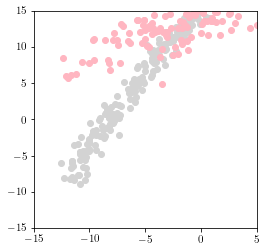

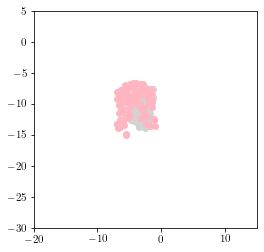

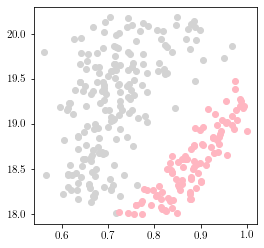

In [131]:
plt.figure(figsize=(4,4))
plt.scatter(test[test.stream]['ϕ'], test[test.stream]['λ'], color='lightgray')
plt.scatter(top_100[top_100.stream == False]['ϕ'], top_100[top_100.stream == False]['λ'], color='lightpink')
plt.scatter(top_100[top_100.stream == True]['ϕ'], top_100[top_100.stream == True]['λ'], color='crimson')
plt.xlim(-15,5);
plt.ylim(-15,15);

plt.figure(figsize=(4,4))
plt.scatter(test[test.stream]['μ_ϕcosλ'], test[test.stream]['μ_λ'], color='lightgray')
plt.scatter(top_100[top_100.stream == False]['μ_ϕcosλ'], top_100[top_100.stream == False]['μ_λ'], color='lightpink')
plt.scatter(top_100[top_100.stream == True]['μ_ϕcosλ'], top_100[top_100.stream == True]['μ_λ'], color='crimson')
plt.xlim(-20,15);
plt.ylim(-30,5);

plt.figure(figsize=(4,4))
plt.scatter(test[test.stream]['b-r'], test[test.stream]['g'], color='lightgray')
plt.scatter(top_100[top_100.stream == False]['b-r'], top_100[top_100.stream == False]['g'], color='lightpink')
plt.scatter(top_100[top_100.stream == True]['b-r'], top_100[top_100.stream == True]['g'], color='crimson')
# plt.invert_yaxis();# plt.xlim(-20,15);
# plt.ylim(-30,5);

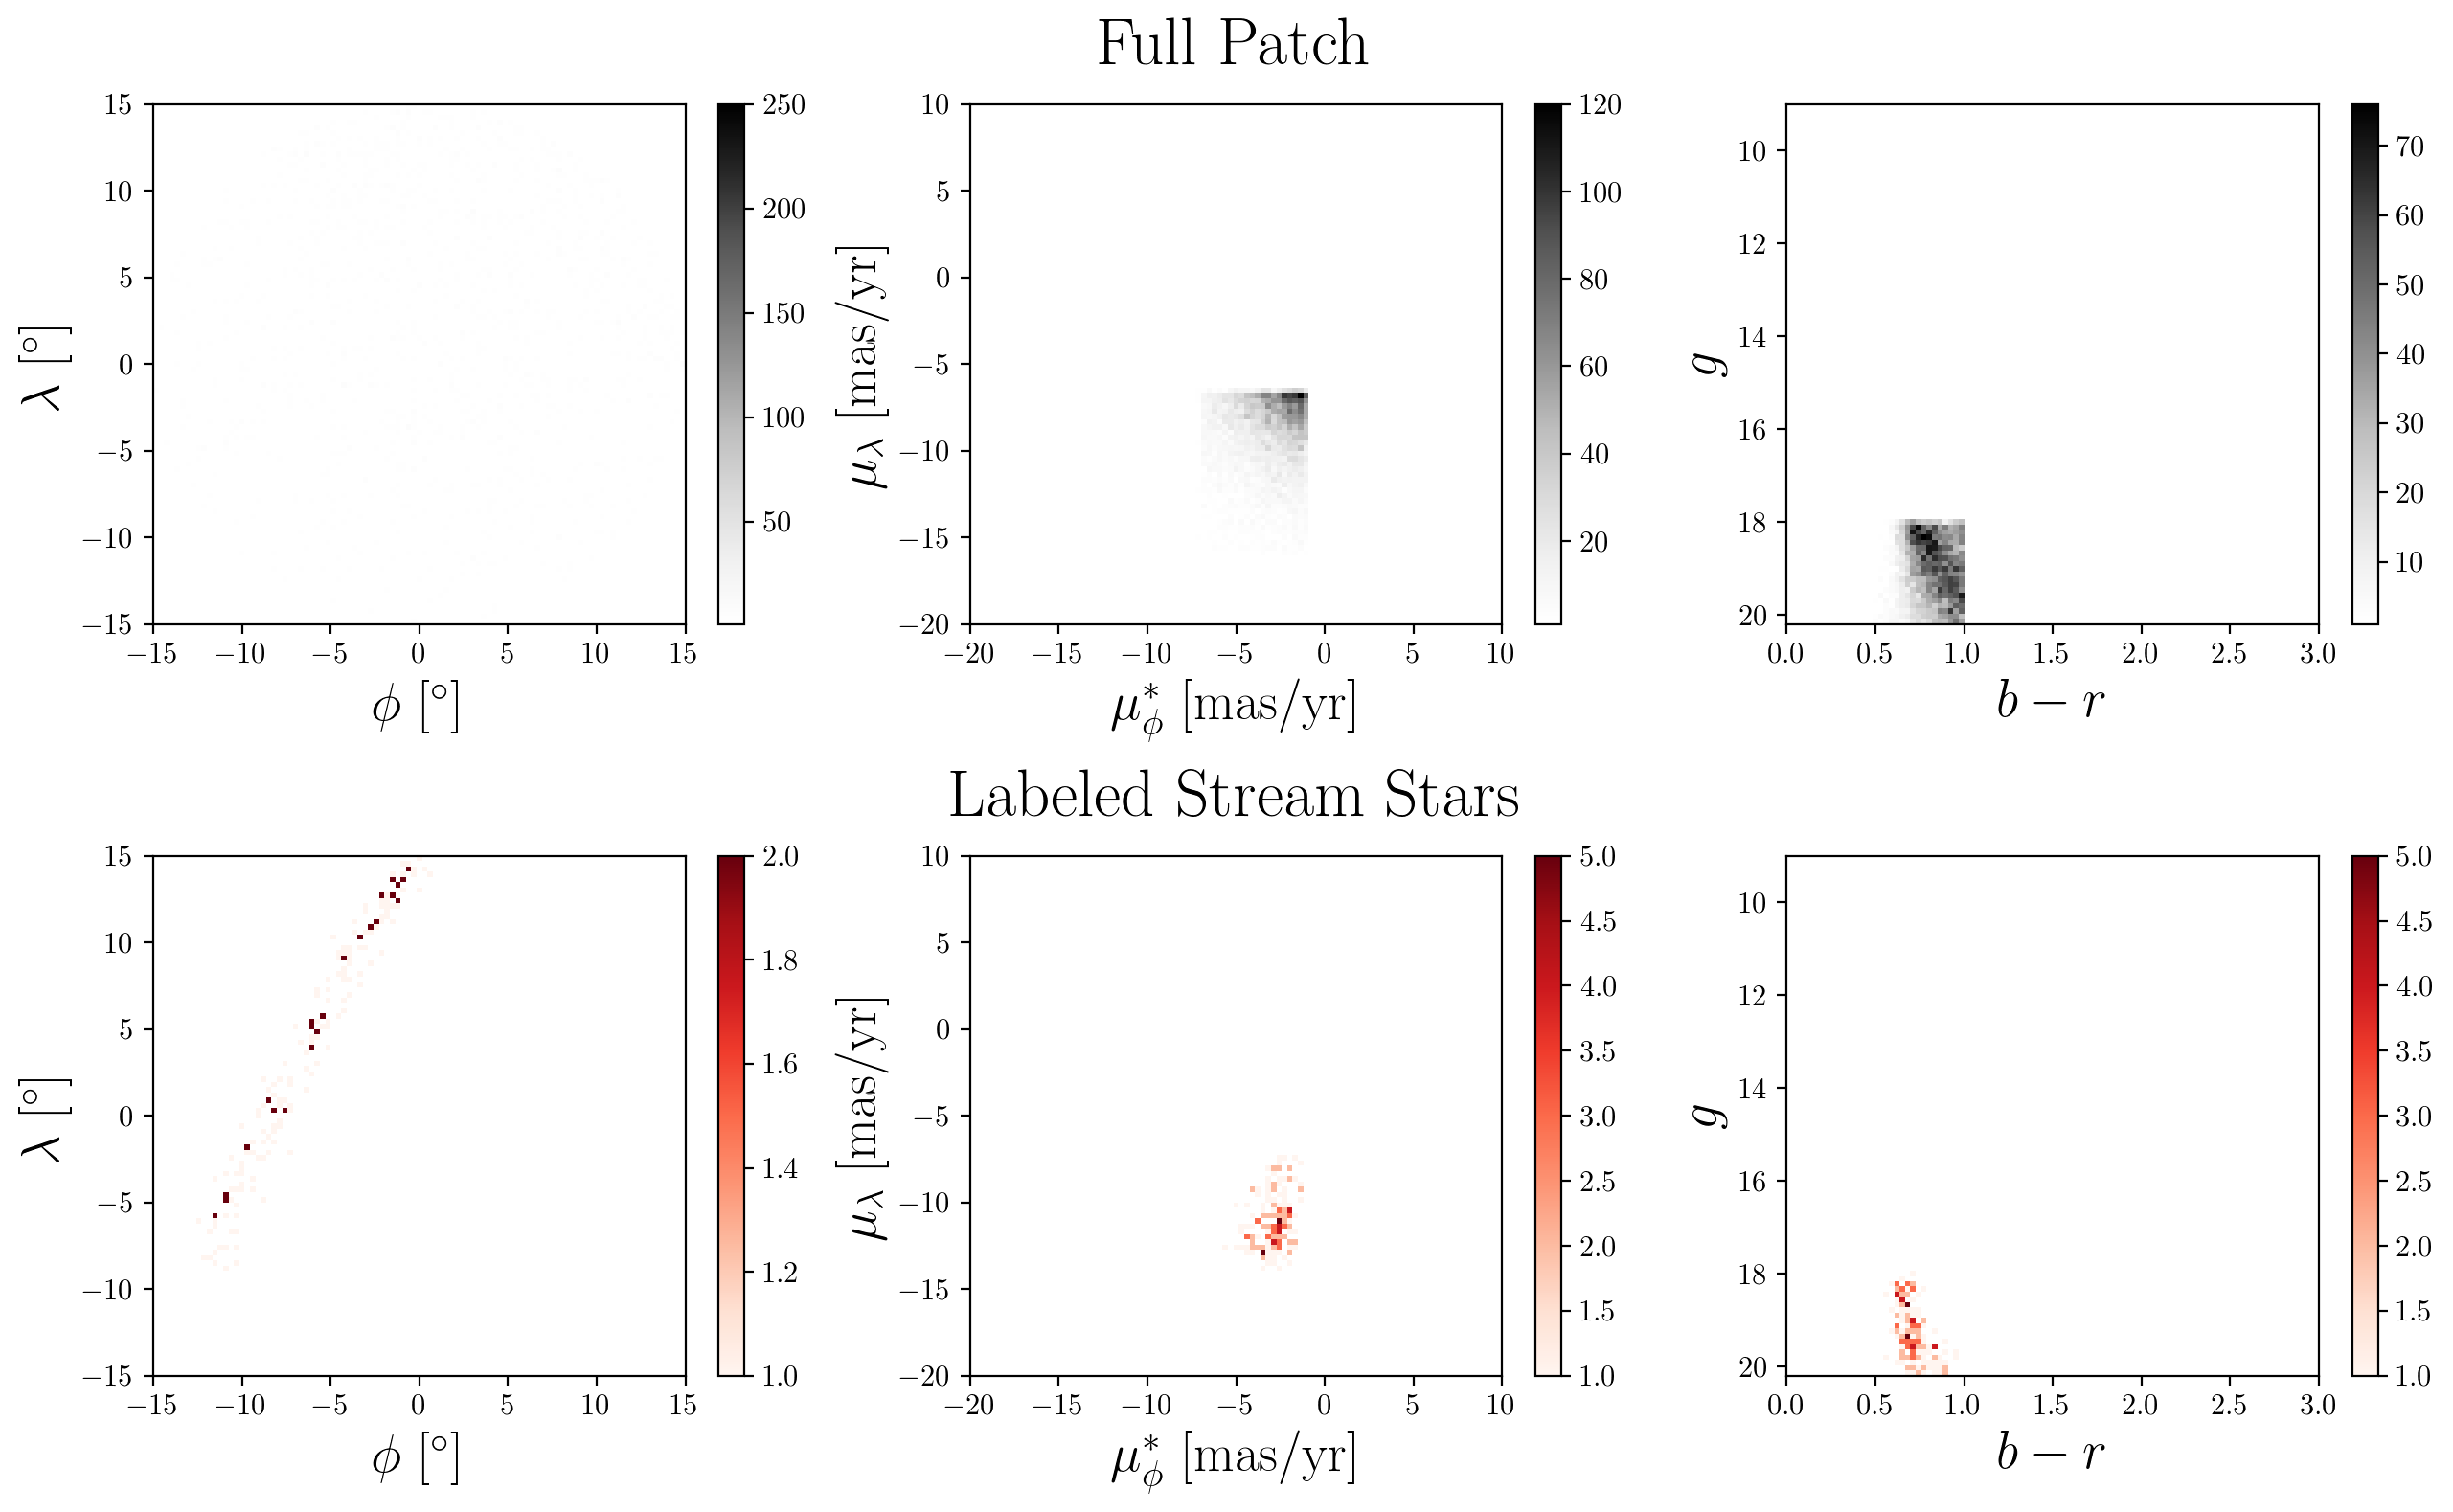

In [132]:
make_plots(test)

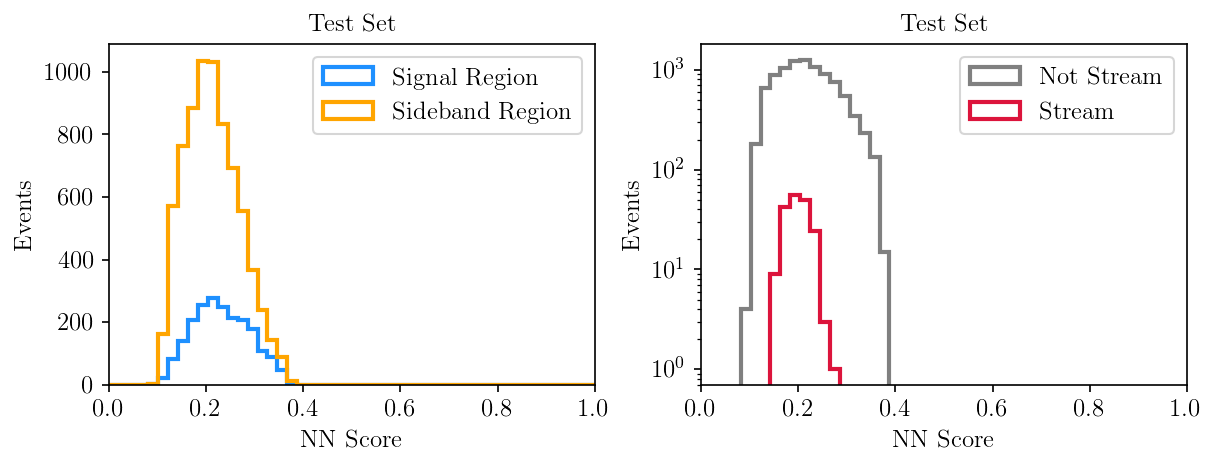

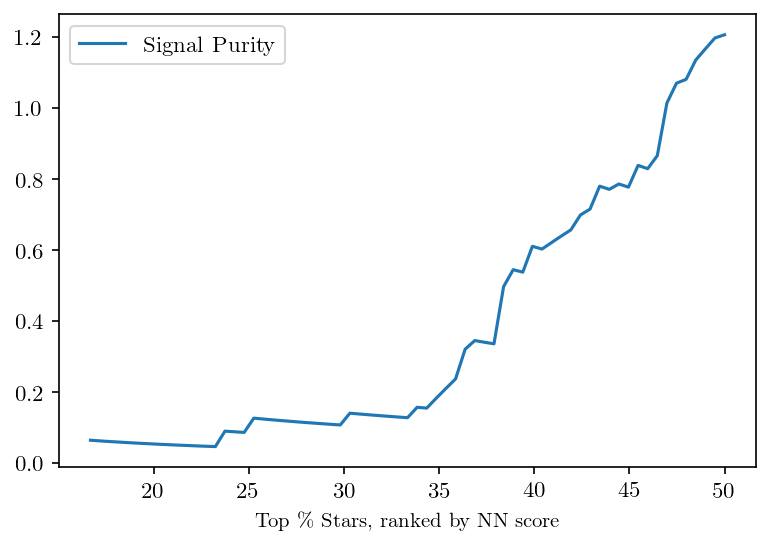

Top 50 stars: Purity = 0.0% 


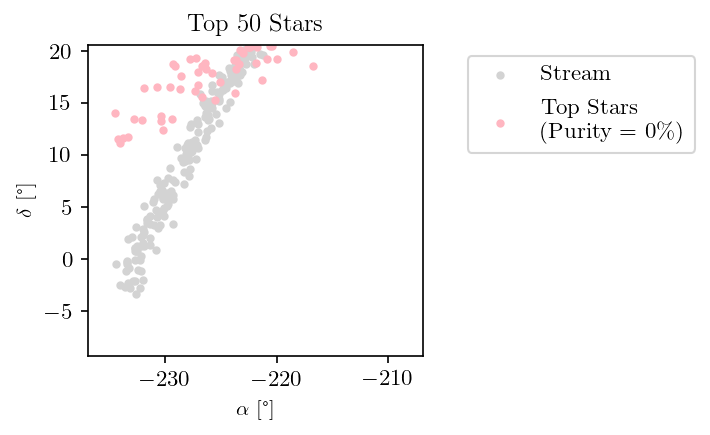

Top 100 stars: Purity = 0.0% 


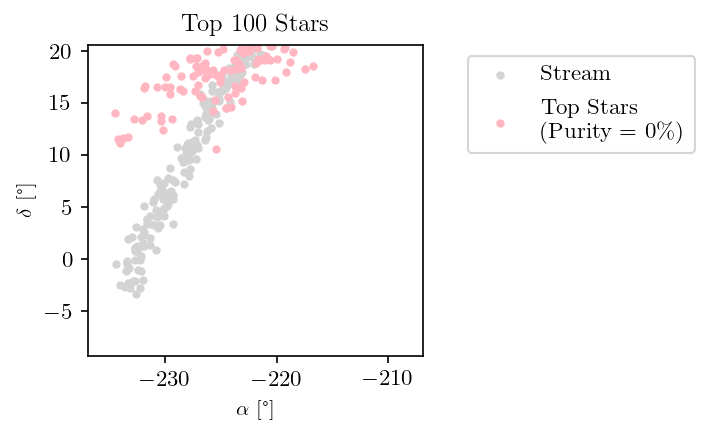

In [133]:
plot_results(test)